# 417 Pacific Atlantic Waterflow
- given an MxN grid to represent an island, heights
- pacific ocean touches top/left edges, atlantic ocean touches bottom/right edges
- heights[r][c] represents the height above sea level at cell (r,c)
- when the island rains, rainwater can flow left, right, up, down only if the neighboring cell's height is less than or equal to that of the current cell
- water can flow from any cell adjacent to the ocean into the ocean
- return 2d grid result where each cell represents the amount of water that could flow into both oceans
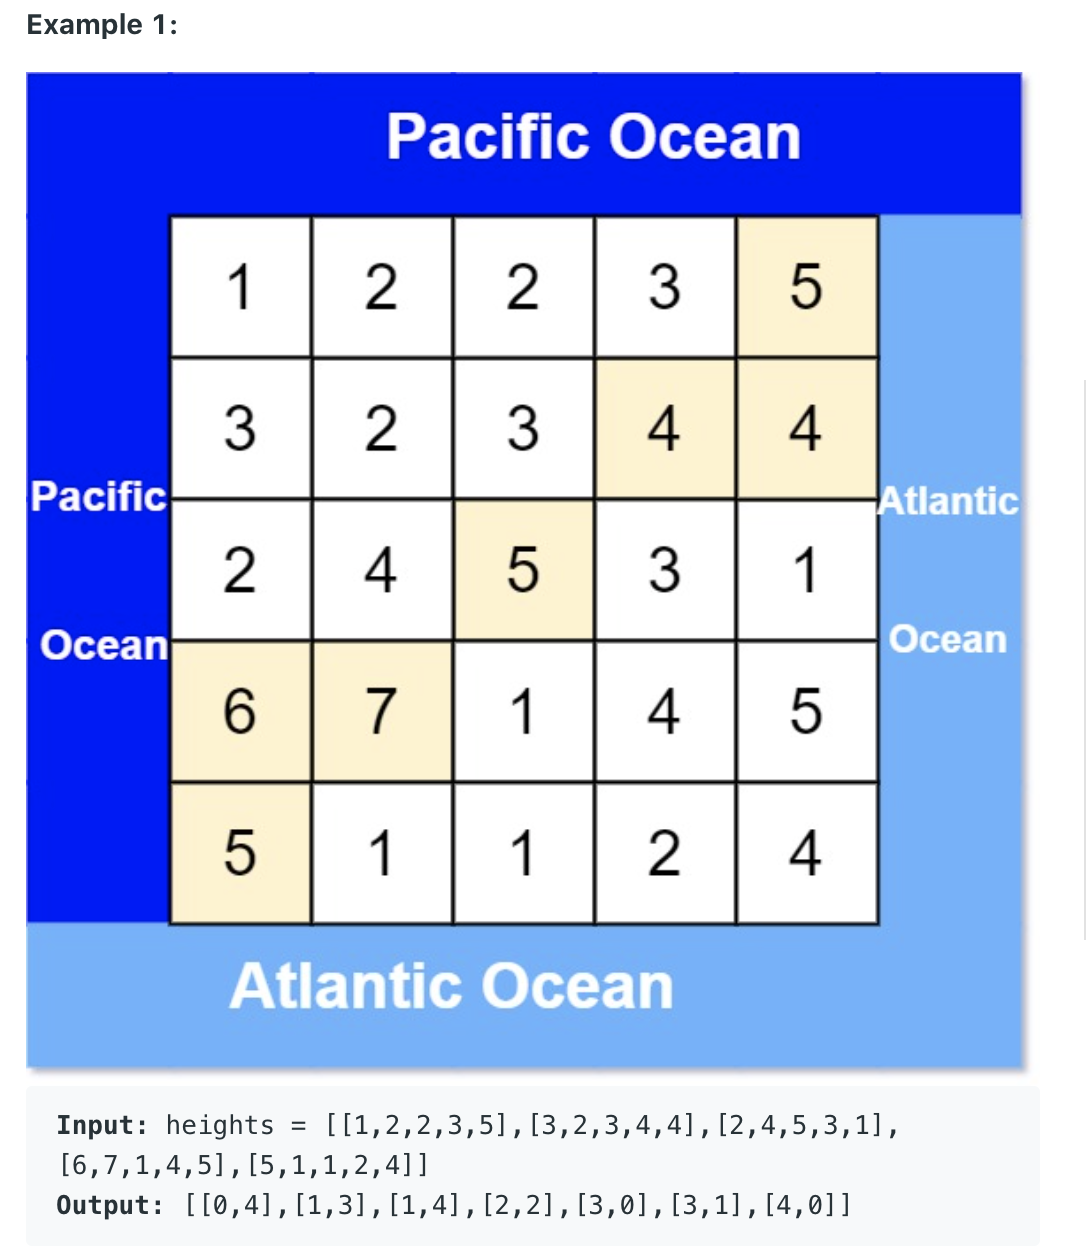

In [49]:
test = [
    [1,2,2,3,5],
    [3,2,3,4,4],
    [2,4,5,3,1],
    [6,7,1,4,5],
    [5,1,1,2,4]
]

In [98]:
# fails some test cases, see solution below
def can_reach_pacific(val, heights, i, j):
    if i <= 0 or j <= 0:
        if val > 0:
            return True
        else:
            return False
    if val >= heights[i-1][j]:
        return can_reach_pacific(val-1, heights, i-1, j)
    if val >= heights[i][j-i]:
        return can_reach_pacific(val-1, heights, i, j-1)
    return False
        
def can_reach_atlantic(val, heights, i, j):
    if i >= len(heights)-1 or j >= len(heights[0])-1:
        if val > 0:
            return True
        else:
            return False
    if val >= heights[i+1][j]:
        return can_reach_atlantic(val-1, heights, i+1, j)
    if val >= heights[i][j+1]:
        return can_reach_atlantic(val-1, heights, i, j+1)  
    return False

def pacific_atlantic(heights):
    result = []
    for i in range(len(heights)):
        for j in range(len(heights[0])):
            temp = heights[i][j]
            a = can_reach_atlantic(temp, heights, i, j)
            b = can_reach_pacific(temp, heights, i, j)
            print(a, b)
            if a and b:
                result.append([i,j])
    return result

In [92]:
pacific_atlantic(test)

False True
False True
False True
False True
True True
False True
False True
False True
True True
True True
False True
False True
True True
True False
True False
True True
True True
False False
True False
True False
True True
True False
True False
True False
True False


[[0, 4], [1, 3], [1, 4], [2, 2], [3, 0], [3, 1], [4, 0]]

In [94]:
class Solution:
    def pacificAtlantic(self, matrix):
        # Check for an empty graph.
        if not matrix:
            return []

        p_visited = set()
        a_visited = set()
        rows, cols = len(matrix), len(matrix[0])
        directions = ((0, 1), (0, -1), (1, 0), (-1, 0))

        def traverse(i, j, visited):
            if (i, j) in visited:
                return
            visited.add((i, j))
            # Traverse neighbors.
            for direction in directions:
                next_i, next_j = i + direction[0], j + direction[1]
                if 0 <= next_i < rows and 0 <= next_j < cols:
                    # Add in your question-specific checks.
                    if matrix[next_i][next_j] >= matrix[i][j]:
                        traverse(next_i, next_j, visited)

        for row in range(rows):
            traverse(row, 0, p_visited)
            traverse(row, cols - 1, a_visited)

        for col in range(cols):
            traverse(0, col, p_visited)
            traverse(rows - 1, col, a_visited)

        return list(p_visited & a_visited)

## Generic DFS template for similar matrix problems

In [97]:
def dfs(matrix):
    # 1. Check for an empty graph.
    if not matrix:
        return []

    # 2. Initialize
    rows, cols = len(matrix), len(matrix[0])
    visited = set()
    directions = ((0, 1), (0, -1), (1, 0), (-1, 0))

    def traverse(i, j):
        # a. Check if visited
        if (i, j) in visited:
            return
        # b. Else add to visted
        visited.add((i, j))

        # c. Traverse neighbors.
        for direction in directions:
            next_i, next_j = i + direction[0], j + direction[1]
            if 0 <= next_i < rows and 0 <= next_j < cols:
                # d. Add in your question-specific checks.
                traverse(next_i, next_j)

    # 3. For each point, traverse it.
    for i in range(rows):
        for j in range(cols):
            traverse(i, j)